y = 0.0674436090225565x + 117.39428571428572


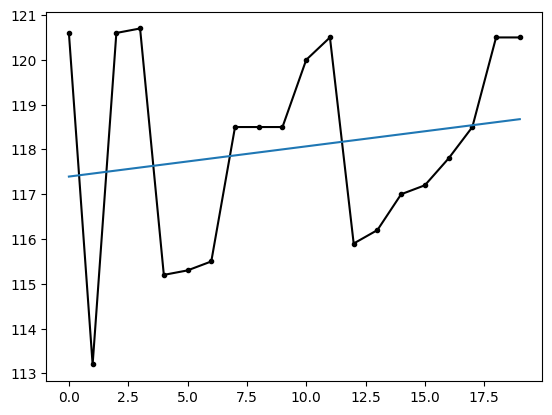

In [100]:
import statistics as st
import matplotlib.pyplot as plt
import seaborn as sns

def linear_trend(x: list, y: list):
    yavg = st.mean(y)
    xavg = st.mean(x)
    chisl = 0
    for i in range(len(x)):
        chisl += (y[i]-yavg)*(x[i]-xavg)
    znam = 0
    for i in range(len(x)):
        znam+=(x[i]-xavg)**2
    beta = chisl/znam
    alpha = yavg-beta*xavg
    return (alpha,beta)



x = [225, 235, 325, 421, 448, 425, 469, 549, 565, 513, 555, 634, 641, 551, 602, 676,
     801, 901, 1102, 1373, 1447, 1527, 1697, 2038, 2044, 1922, 2120, 2536, 2461, 2268,
     2523, 3074, 2998, 2893.1]
x = [120.6, 113.2,  120.6, 120.7, 115.2, 115.3, 115.5,  118.5, 118.5,
     118.5, 120, 120.5, 115.9, 116.2, 117, 117.2, 117.8, 118.5, 120.5, 120.5]

y = [i for i in range(len(x))]

b,a=linear_trend(y,x)
print("y = ",a,"x + ",b,sep="")
#a=1

plt.plot([i for i in range(len(x))], x, "k-",
         [i for i in range(len(x))],x, "k.")
#sns.lineplot(x=[i for i in range(110,120)],y=[a*x1+b for x1 in range(0,10)])
sns.lineplot(x=[x for x in range(len(x))], y=[a*x + b for x in range(len(x))])
plt.show()


